In [1]:
import psycopg2
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

In [2]:
# Loading dataframe and renaming variable/values:

df = pd.read_csv(r"/Users/plamena/Desktop/Prevalence_dataset.csv")
df.rename(columns={"Time": "Time Point", "Group":"Incarceration Status"}, inplace=True)
df["Incarceration Status"] = df["Incarceration Status"].replace(["Available"], "All available")
df["Incarceration Status"] = df["Incarceration Status"].replace(["Never_reincarc"], "Never incarcerated after baseline")
df["Incarceration Status"] = df["Incarceration Status"].replace(["Not_incarc"], "Not currently incarcerated")

In [3]:
# Subsetting dataframe by Disorder:

int_df = df[(df["Disorder"] == "Internalizing")]
beh_df = df[(df["Disorder"] == "Behavioral")]
sub_df = df[(df["Disorder"] == "Substance")]

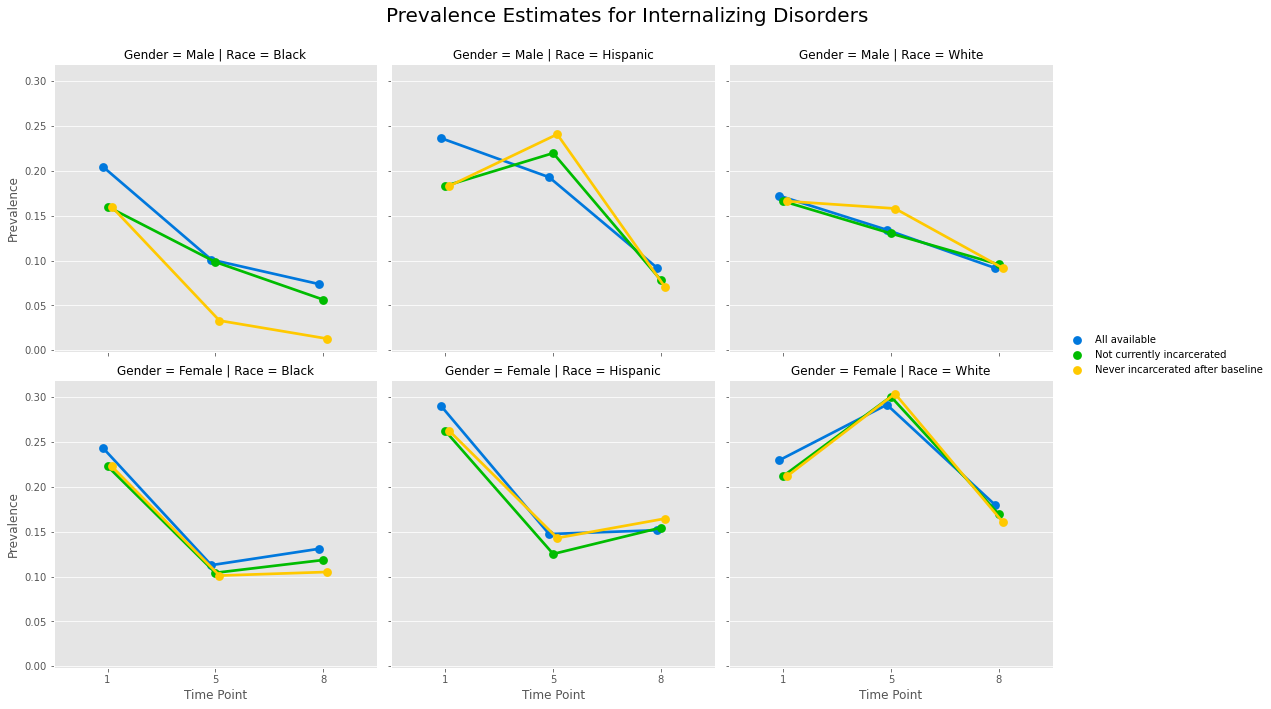

In [4]:
g1=sns.FacetGrid(int_df, col="Race", row="Gender", height=5)

g1.map_dataframe(sns.pointplot, 
        data=int_df, 
        x="Time Point",
        y="Prevalence", 
        hue="Incarceration Status",
        order=[1, 5, 8], 
        dodge=True,
        ci=None,
        hue_order=["All available","Not currently incarcerated", "Never incarcerated after baseline"], 
        palette="nipy_spectral")
g1.add_legend()
g1.fig.subplots_adjust(top=0.9)
g1.fig.suptitle("Prevalence Estimates for Internalizing Disorders", 
                fontsize=20)
plt.savefig('Internalizing.png')


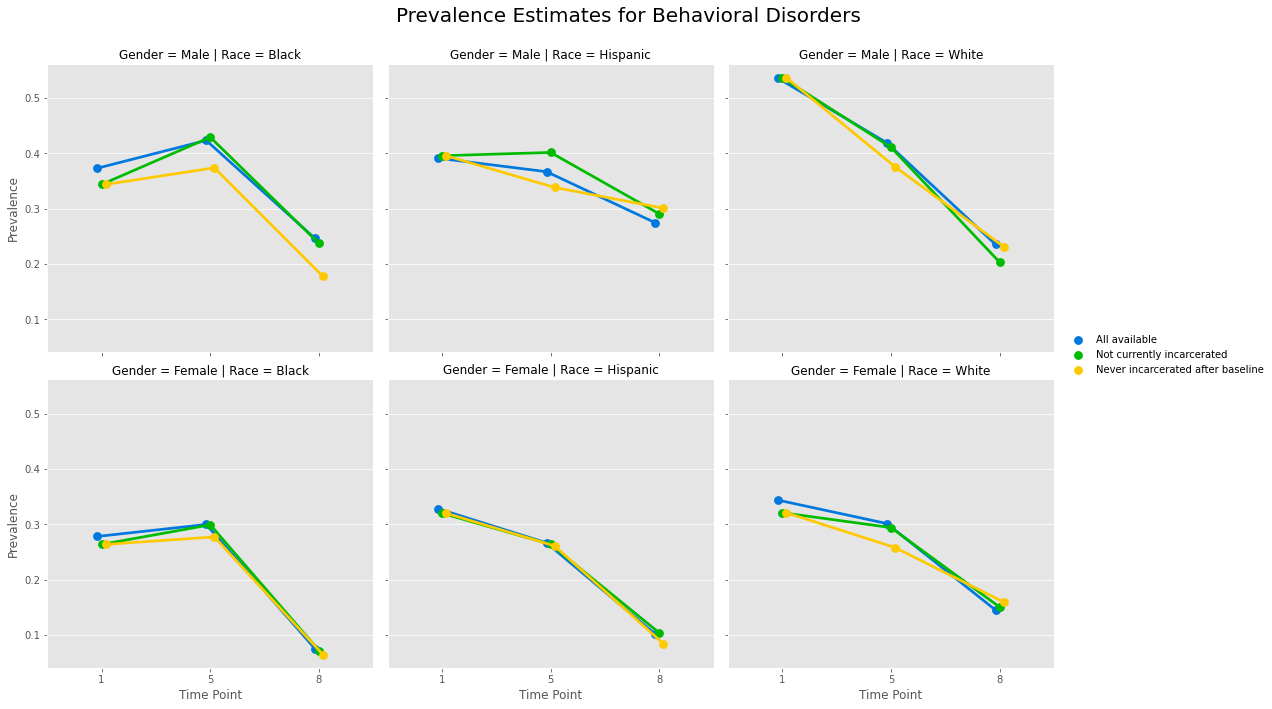

In [5]:
g2=sns.FacetGrid(beh_df, col="Race", row="Gender", height=5)
g2.map_dataframe(sns.pointplot, 
        data=beh_df, 
        x="Time Point", 
        y="Prevalence",
        hue="Incarceration Status",
        order=[1, 5, 8], 
        dodge=True, 
        ci=None,
        hue_order=["All available","Not currently incarcerated", "Never incarcerated after baseline"],
        palette="nipy_spectral")
g2.add_legend()
g2.fig.subplots_adjust(top=0.9)
g2.fig.suptitle("Prevalence Estimates for Behavioral Disorders", 
                fontsize=20)
plt.savefig("Behavioral.png")

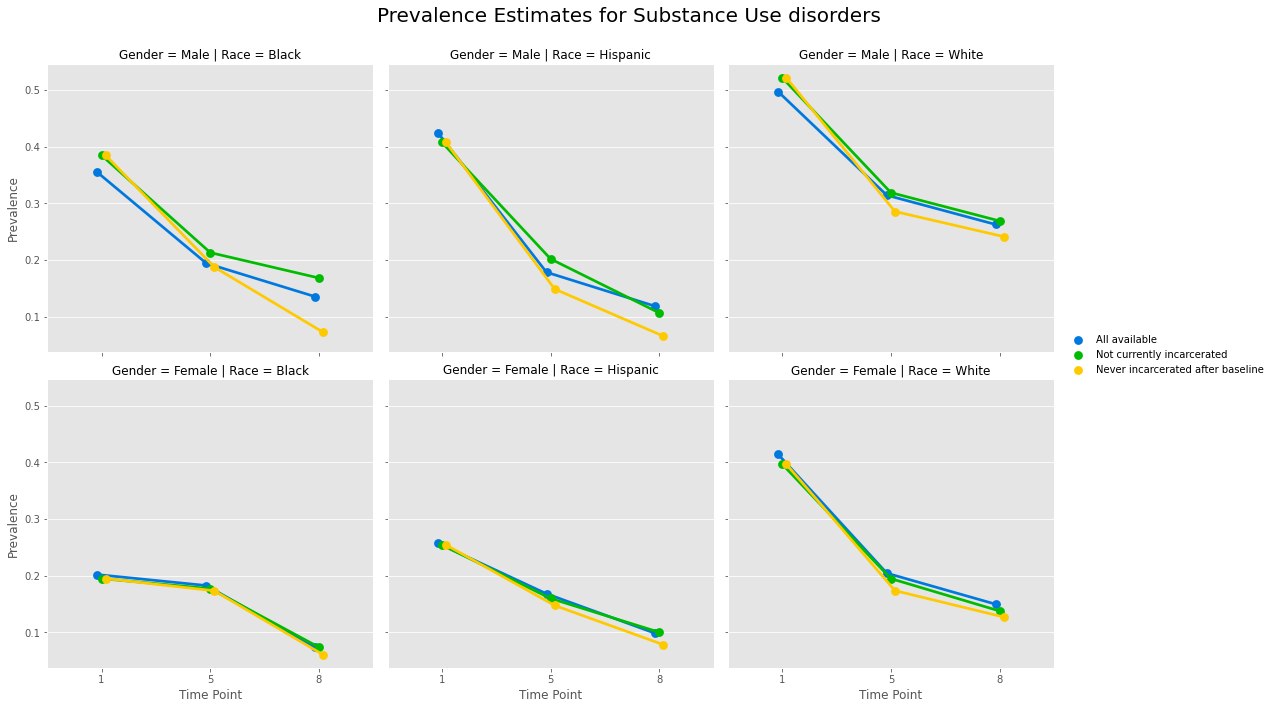

In [6]:
g3=sns.FacetGrid(sub_df, col="Race", row="Gender", height=5)
g3.map_dataframe(sns.pointplot, 
        data=sub_df, 
        x="Time Point", 
        y="Prevalence", 
        hue="Incarceration Status",
        order=[1, 5, 8],
        dodge=True,
        ci=None,
        hue_order=["All available","Not currently incarcerated", "Never incarcerated after baseline"],
        palette="nipy_spectral")
g3.add_legend()
g3.fig.subplots_adjust(top=0.9)
g3.fig.suptitle("Prevalence Estimates for Substance Use disorders", 
                fontsize=20)
plt.savefig("Substabce.png")